In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from difflib import get_close_matches
from sklearn.metrics.pairwise import cosine_similarity

plt.style.use('seaborn')

In [28]:
genres_item_matrix = pd.read_csv('data/genres_item_matrix.csv', index_col='id')
tag_item_matrix = pd.read_csv('data/tag_item_matrix.csv', index_col='id')
title_df = pd.read_csv('data/title_df.csv', index_col='id')

In [29]:
# We'll use this dataframe later for lookup
title_df.head()

,romaji,english,native,userPreferred
id,,,,
10161,No.6,No.6,NO.6 ナンバー・シックス,No.6
99726,Net-juu no Susume,Recovery of an MMO Junkie,ネト充のススメ,Net-juu no Susume
98526,Robomasters The Animated Series,NaN,ROBOMASTERS THE ANIMATED SERIES,Robomasters The Animated Series
966,Crayon Shin-chan,Shin Chan,クレヨンしんちゃん,Crayon Shin-chan
4876,Hashire Melos!,Run Melos!,走れメロス,Hashire Melos!


In [30]:
genres_item_matrix.head()

,action,adventure,comedy,drama,ecchi,fantasy,horror,mahou_shoujo,mecha,music,mystery,psychological,romance,sci_fi,slice_of_life,sports,supernatural,thriller
id,,,,,,,,,,,,,,,,,,
10161,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
99726,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
98526,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
966,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4876,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
tag_item_matrix.head()

,4_koma,achronological_order,acting,advertisement,afterlife,age_gap,age_regression,agender,airsoft,aliens,...,witch,work,wrestling,writing,wuxia,yakuza,yandere,youkai,yuri,zombie
id,,,,,,,,,,,,,,,,,,,,,
10161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
99726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df = pd.concat([genres_item_matrix, tag_item_matrix], axis=1)
df.head()

,action,adventure,comedy,drama,ecchi,fantasy,horror,mahou_shoujo,mecha,music,...,witch,work,wrestling,writing,wuxia,yakuza,yandere,youkai,yuri,zombie
id,,,,,,,,,,,,,,,,,,,,,
10161,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
99726,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98526,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
966,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4876,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df.tail()

,action,adventure,comedy,drama,ecchi,fantasy,horror,mahou_shoujo,mecha,music,...,witch,work,wrestling,writing,wuxia,yakuza,yandere,youkai,yuri,zombie
id,,,,,,,,,,,,,,,,,,,,,
99586,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
101283,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101633,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
101089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9832 entries, 10161 to 101089
Columns: 265 entries, action to zombie
dtypes: int64(265)
memory usage: 20.0 MB


In [35]:
df.describe()

,action,adventure,comedy,drama,ecchi,fantasy,horror,mahou_shoujo,mecha,music,...,witch,work,wrestling,writing,wuxia,yakuza,yandere,youkai,yuri,zombie
count,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000,...,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000,9832.000000
mean,0.268002,0.213283,0.391172,0.190704,0.062449,0.198841,0.034886,0.025325,0.082994,0.097539,...,0.006001,0.018206,0.002034,0.001526,0.000305,0.003458,0.004577,0.011086,0.025427,0.005391
std,0.442941,0.409647,0.488038,0.392876,0.241982,0.399148,0.183501,0.157120,0.275888,0.297048,...,0.077236,0.133702,0.045058,0.039032,0.017466,0.058707,0.067501,0.104711,0.157427,0.073226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
total_per_feature = df.sum(axis=0)
total_per_feature

action       2635
adventure    2097
comedy       3846
drama        1875
ecchi         614
             ... 
yakuza         34
yandere        45
youkai        109
yuri          250
zombie         53
Length: 265, dtype: int64

In [37]:
total_per_show = df.sum(axis=1)
total_per_show

id
10161      9
99726     13
98526      5
966        9
4876      11
          ..
99586     11
99916      7
101283    18
101633    12
101089     3
Length: 9832, dtype: int64

In [38]:
total_per_show.rename('total_features_per_show')

id
10161      9
99726     13
98526      5
966        9
4876      11
          ..
99586     11
99916      7
101283    18
101633    12
101089     3
Name: total_features_per_show, Length: 9832, dtype: int64

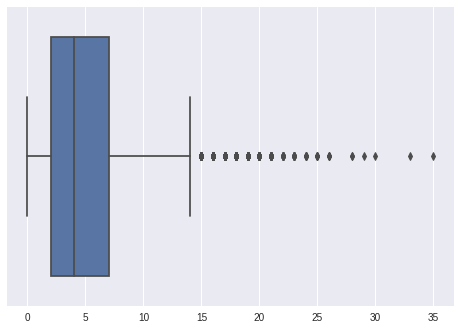

In [39]:
sns.boxplot(total_per_show);

This seems potentially problematic. A majority of the shows don't have very many features. How many are needed to make an acurate recommendation?

In [42]:
def count_for_n_features(series, n):
    print('{0:.1%}'.format(len(series[series <= n]) / len(series)), 
          'or', len(series[series <= n]), f'shows have {n} or fewer features describing them.')


In [43]:
count_for_n_features(total_per_show, 2)

28.5% or 2805 shows have 2 or fewer features describing them.


In [44]:
count_for_n_features(total_per_show, 3)

41.0% or 4034 shows have 3 or fewer features describing them.


In [45]:
count_for_n_features(total_per_show, 4)

51.3% or 5047 shows have 4 or fewer features describing them.


While selecting which tags to keep, many were cut out because of a low "rank" score. Let's go back and keep all tags but normalize(standardize?) them. 

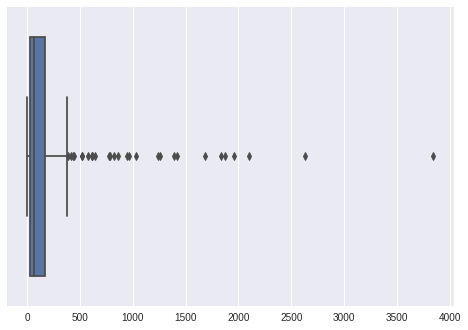

In [46]:
sns.boxplot(total_per_feature);

In [51]:
# the tags below each describe 5 or fewer anime. They can be dropped without losing too much.
total_per_feature[total_per_feature < 6]

airsoft         5
asexual         4
badminton       2
bondage         5
calligraphy     4
centaur         5
cheerleading    5
ero_guro        4
feet            1
full_color      1
go              4
lacrosse        4
masturbation    1
netorare        4
pov             1
prostitution    1
reformation     1
rugby           3
surfing         3
table_tennis    4
teens_love      3
urination       1
vikings         2
voyeur          1
wuxia           3
dtype: int64

In [69]:
title_df[title_df['english'] == 'Space Dandy']

,romaji,english,native,userPreferred
id,,,,
20057,Space☆Dandy,Space Dandy,スペース☆ダンディ,Space☆Dandy


In [90]:
search_term = input('What show would you like recommendations for?')
print('Search term:', search_term)
search_result = get_close_matches('Fullmetal Alchemist', title_df['userPreferred'], cutoff=0.25, n=1)
print('Closest match', search_result)
search_result_idx = title_df[title_df['userPreferred'].isin(search_result)].index

search_result_idx

What show would you like recommendations for?Fullmetal Alchemist: Brotherhood
Search term: Fullmetal Alchemist: Brotherhood
Closest match ['Hagane no Renkinjutsushi: Fullmetal Alchemist']


Int64Index([5114], dtype='int64', name='id')

In [92]:
df.iloc[search_result_idx, :]

,action,adventure,comedy,drama,ecchi,fantasy,horror,mahou_shoujo,mecha,music,...,witch,work,wrestling,writing,wuxia,yakuza,yandere,youkai,yuri,zombie
id,,,,,,,,,,,,,,,,,,,,,
21409,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [102]:
all_idxs = df.index

In [103]:
all_idxs.get_loc(int(search_result_idx.values))

5

In [94]:
cosine_similarity(df.values)[]

array([[1.        , 0.        , 0.2981424 , ..., 0.        , 0.09622504,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.06537205, 0.16012815,
        0.32025631],
       [0.2981424 , 0.        , 1.        , ..., 0.        , 0.12909944,
        0.        ],
       ...,
       [0.        , 0.06537205, 0.        , ..., 1.        , 0.        ,
        0.13608276],
       [0.09622504, 0.16012815, 0.12909944, ..., 0.        , 1.        ,
        0.16666667],
       [0.        , 0.32025631, 0.        , ..., 0.13608276, 0.16666667,
        1.        ]])

In [104]:
# PCA